In [1]:
df['Stable'].value_counts()

NameError: name 'df' is not defined

In [193]:
dftest['Stable'].value_counts()

False    1056
True      444
Name: Stable, dtype: int64

In [2]:
# Reading in the data:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import interp1d
trainData = pd.read_csv('../data/1e7data_train.csv', index_col=0)
testData = pd.read_csv('../data/1e7data_holdout.csv', index_col=0)
df = trainData
dftest = testData
dftest.tail()

,Stable,Norbits_instability,Norbits,Mplanet,RH/a,a1,P1,e1,pomega1,inc1,...,norm_min_e2,norm_min_window10_e2,norm_min_e3,norm_min_window10_e3,norm_min_inc1,norm_min_window10_inc1,norm_min_inc2,norm_min_window10_inc2,norm_min_inc3,norm_min_window10_inc3
Sim_ID,,,,,,,,,,,,,,,,,,,,,
3189,True,1.000000e+07,10000000.0,0.000015,0.021544,0.058617,0.014192,0.015881,-2.477519,0.014474,...,0.000729,0.008062,0.000085,0.024593,0.000107,0.000610,0.000093,0.001062,0.000214,8.957564e-07
468,False,2.712704e+04,10000000.0,0.000015,0.021544,0.059914,0.014665,0.003740,-2.241450,0.006668,...,0.000555,0.056411,0.000001,0.090411,0.000205,0.000846,0.000088,0.001346,0.000611,5.623516e-04
1581,True,1.000000e+07,10000000.0,0.000015,0.021544,0.053190,0.012267,0.009476,2.538135,0.012662,...,0.000048,0.031199,0.000106,0.005515,0.000466,0.000243,0.000099,0.003004,0.000554,1.450827e-03
3484,False,6.276198e+06,10000000.0,0.000015,0.021544,0.053380,0.012333,0.012028,-5.486679,0.017237,...,0.000272,0.000539,0.000032,0.016502,0.000156,0.001146,0.000093,0.002320,0.000223,7.816216e-04
1050,False,2.954313e+05,10000000.0,0.000015,0.021544,0.046440,0.010008,0.006941,-1.087950,0.015286,...,0.000137,0.003373,0.000049,0.010093,0.000490,0.000791,0.000432,0.001049,0.001139,4.961096e-03


In [176]:
features = []
features += ['daOverRH1', 'daOverRH2']
features += ['mindaOverRH', 'maxdaOverRH']
#features += ['daOvera1', 'daOvera2']
#features += ['mindaOvera', 'maxdaOvera']
features += ['norm_std_a1', 'norm_max_a1', 'norm_std_window10_a1', 'norm_max_window10_a1']
features += ['norm_std_a2', 'norm_max_a2', 'norm_std_window10_a2', 'norm_max_window10_a2']
features += ['norm_std_a3', 'norm_max_a3', 'norm_std_window10_a3', 'norm_max_window10_a3']
#features += ['norm_std_e1', 'norm_max_e1', 'norm_std_window10_e1', 'norm_max_window10_e1']
#features += ['norm_std_e2', 'norm_max_e2', 'norm_std_window10_e2', 'norm_max_window10_e2']
#features += ['norm_std_e3', 'norm_max_e3', 'norm_std_window10_e3', 'norm_max_window10_e3']
#features += ['avg_eH1', 'std_eH1', 'max_eH1', 'min_eH1']
features += ['avg_ecross1', 'std_ecross1', 'max_ecross1', 'min_ecross1']
#features += ['avg_eH2', 'std_eH2', 'max_eH2', 'min_eH2']
features += ['avg_ecross2', 'std_ecross2', 'max_ecross2', 'min_ecross2']
#features += ['avg_eH3', 'std_eH3', 'max_eH3', 'min_eH3']
features += ['avg_ecross3', 'std_ecross3', 'max_ecross3', 'min_ecross3']
#features += ['norm_std_inc1', 'norm_max_inc1', 'norm_std_window10_inc1', 'norm_max_window10_inc1']
#features += ['norm_std_inc2', 'norm_max_inc2', 'norm_std_window10_inc2', 'norm_max_window10_inc2']
#features += ['norm_std_inc3', 'norm_max_inc3', 'norm_std_window10_inc3', 'norm_max_window10_inc3']
#features += ['std_iH1', 'max_iH1', 'min_iH1']
#features += ['std_iH2', 'max_iH2', 'min_iH2']
#features += ['std_iH3', 'max_iH3', 'min_iH3']
#features += ['mean_std_iH']
features += ['norm_a1_slope', 'norm_a2_slope', 'norm_a3_slope']
features += ['norm_LyapunovTime']

y = df['Stable']
X = df[features]
X.head()

,daOverRH1,daOverRH2,mindaOverRH,maxdaOverRH,norm_std_a1,norm_max_a1,norm_std_window10_a1,norm_max_window10_a1,norm_std_a2,norm_max_a2,...,max_ecross2,min_ecross2,avg_ecross3,std_ecross3,max_ecross3,min_ecross3,norm_a1_slope,norm_a2_slope,norm_a3_slope,norm_LyapunovTime
Sim_ID,,,,,,,,,,,,,,,,,,,,,
2414,8.989360,6.969123,6.969123,8.989360,0.000112,0.000557,0.000091,0.000193,0.000205,0.000911,...,0.115612,0.019679,0.066888,0.017673,0.102802,0.027418,9.070729e-12,5.392272e-11,-5.233243e-11,2779.936244
4056,5.924768,5.095487,5.095487,5.924768,0.001214,0.003334,0.001208,0.001626,0.001574,0.006648,...,0.291462,0.001187,0.148535,0.069732,0.334388,0.006351,-7.677887e-09,2.201825e-09,6.922318e-09,197.311426
4855,7.241825,8.398691,7.241825,8.398691,0.000166,0.000862,0.000054,0.000086,0.000194,0.000839,...,0.070628,0.018320,0.038436,0.003682,0.046075,0.028775,-2.157238e-11,2.878952e-10,-2.463631e-10,1798.042109
517,8.840869,8.943640,8.840869,8.943640,0.000115,0.000579,0.000076,0.000190,0.000155,0.000611,...,0.069066,0.010557,0.058153,0.024756,0.093602,0.012941,2.259498e-10,-1.393307e-10,-6.778557e-11,1436.312951
1520,5.908519,5.085694,5.085694,5.908519,0.000833,0.003023,0.001136,0.001878,0.001257,0.003520,...,0.325461,0.003612,0.145188,0.070540,0.296287,0.002405,1.115990e-09,-5.790419e-09,5.156142e-09,151.410089


In [177]:
#Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
import ipywidgets as widgets
from ipywidgets import FloatSlider, fixed
from ipywidgets.widgets.widget_selection import SelectionSlider

In [190]:
model = XGBClassifier(seed=27, learning_rate=0.01, n_estimators=10000)


Model Report
Accuracy : 0.8807
AUC Score (Test): 0.943001


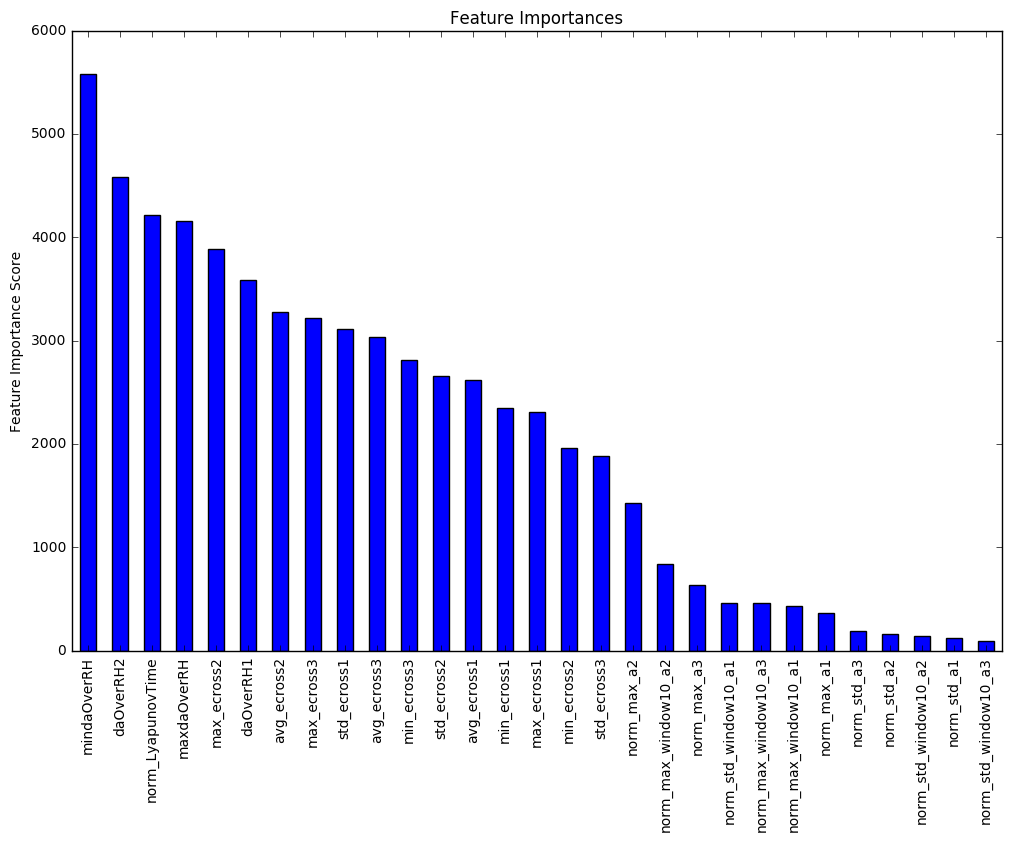

In [178]:
model = XGBClassifier(seed=27, learning_rate=0.01, n_estimators=10000)
model.fit(df[features], df['Stable'],eval_metric='auc')
        
#Predict training set:
dtrain_predictions = model.predict(df[features])
dtest_predictions = model.predict(dftest[features])
dtrain_predprob = model.predict_proba(df[features])[:,1]
dtest_predprob = model.predict_proba(dftest[features])[:,1]

#Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(dftest['Stable'].values, dtest_predictions)
#print "AUC Score (Train): %f" % metrics.roc_auc_score(df['Stable'], dtrain_predprob)
print "AUC Score (Test): %f" % metrics.roc_auc_score(dftest['Stable'], dtest_predprob)


feat_imp = pd.Series(model.booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances', figsize=(12,8))
plt.ylabel('Feature Importance Score')

In [10]:
features

['daOverRH1',
 'daOverRH2',
 'mindaOverRH',
 'maxdaOverRH',
 'norm_std_a1',
 'norm_max_a1',
 'norm_std_window10_a1',
 'norm_max_window10_a1',
 'norm_std_a2',
 'norm_max_a2',
 'norm_std_window10_a2',
 'norm_max_window10_a2',
 'norm_std_a3',
 'norm_max_a3',
 'norm_std_window10_a3',
 'norm_max_window10_a3',
 'avg_ecross1',
 'std_ecross1',
 'max_ecross1',
 'min_ecross1',
 'avg_ecross2',
 'std_ecross2',
 'max_ecross2',
 'min_ecross2',
 'avg_ecross3',
 'std_ecross3',
 'max_ecross3',
 'min_ecross3',
 'norm_a1_slope',
 'norm_a2_slope',
 'norm_a3_slope',
 'norm_LyapunovTime']

This function, adapted from Diana's notebook, does CV on the passed model, and prints out the optimal number of iterations for the adopted hyperparameters (`xgb.cv` will run up to `n_estimators` rounds, but if the CV score doesn't improve in `early_stopping_rounds` rounds, it will stop, and will return the sequence of CV scores with the last 50 cut out).

In [5]:
def optimize_n_estimators(model, df, features, cv_folds=5, early_stopping_rounds=50):
    # xgb.cv performs CV at each boosting iteration, and stops when CV score doesn't improve, 
    # so we can use it to set the optimal number of boosting rounds num_boost_round (n_estimators)
    xgb_param = model.get_xgb_params()
    xgtrain = xgb.DMatrix(df[features].values, label=df['Stable'].values)
    cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=model.get_params()['n_estimators'], nfold=cv_folds,
        metrics='auc', early_stopping_rounds=early_stopping_rounds)
    
    testmeanauc = cvresult.tail(1).values[0,0]
    teststdauc = cvresult.tail(1).values[0,1]
    optimal_n_estimators = cvresult.index.values[-1]
    
    print("Learning Rate: {0}".format(model.learning_rate))
    print("CV score: {0} +/ {1}".format(testmeanauc, teststdauc/np.sqrt(cv_folds)))
    print("Optimal number of iterations (n_estimators) = {0}.".format(optimal_n_estimators))

The lower `n_estimators` is, the faster the models will train, so we want to pick a reasonably small value at first to optimize in the high dimensional hyperparameter space.  The lower the `learning_rate`, the more rounds (`n_estimators`) it needs to run.  `learning_rate` goes from [0,1], so let's see how many rounds we have to run at the high end of that range:

In [6]:
#A.S. Doesn't work for some reason
model = XGBClassifier(seed=27, n_estimators=10000)
learning_rates = np.linspace(0.05, 0.5, 10)
for learning_rate in learning_rates:
    model.set_params(learning_rate=learning_rate)
    optimize_n_estimators(model, df, features)

XGBoostError: There are NAN in the matrix, however, you did not set missing=NAN

`learning_rate` = 0.2 does almost as well as 0.1, so let's run that one.  Let's choose a slightly higher `n_estimators` since as we vary the other parameters, 131 will no longer be the optimal value:

In [13]:
model.set_params(learning_rate=0.1, n_estimators=400)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=400, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=1)

I next tried to optimize `max_depth` and `min_child_weight` simultaneously.  This is not what Kristen suggested, but I was playing around and seeing as this data set is so tiny, there's no computational bottleneck at all.  `max_depth` is the depth of the trees, and we only have about 20 features, so don't need to test values > 20.

Here I set the ranges for the parameters

In [191]:
Nfolds = 5
max_depth = [4, 8, 12, 18, 24]
min_child_weight = np.logspace(-1,1.3,5)

param_grid = dict(max_depth=max_depth, min_child_weight=min_child_weight)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring='roc_auc',iid=False, cv=Nfolds)
grid.fit(df[features],df['Stable'])

# get the names of the parameters
param_names = param_grid.keys()
param_vals = [[val for val in param_grid[param_name]] for param_name in param_names]
param_val_names = {param_name:["{0}".format(val) for val in param_grid[param_name]] for param_name in param_names}

ValueError: 'pr_auc' is not a valid scoring value. Valid options are ['accuracy', 'adjusted_rand_score', 'average_precision', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'log_loss', 'mean_absolute_error', 'mean_squared_error', 'median_absolute_error', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc']

I wrote some functions to help visualize the results

In [15]:
%matplotlib inline
from matplotlib.colors import Normalize
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

def plotgrid(grid, vmin, vmax, midpoint):
    param_grid = grid.param_grid
    
    # get the names of the parameters
    param1 = param_grid.keys()[0]
    param2 = param_grid.keys()[1]

    # plot the scores of the grid
    # grid_scores_ contains parameter settings and scores
    # We extract just the scores
    scores = np.fabs([x[1] for x in grid.grid_scores_])
    scores = np.array(scores).reshape(len(param_grid[param1]), len(param_grid[param2]))

    plt.figure(figsize=(12, 6))
    plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
    plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot, norm=MidpointNormalize(vmin=vmin, vmax=vmax, midpoint=midpoint))
    plt.xlabel(param2)
    plt.ylabel(param1)
    plt.colorbar()
    plt.xticks(np.arange(len(param_grid[param2])), np.round(param_grid[param2], decimals=2))
    plt.yticks(np.arange(len(param_grid[param1])), np.round(param_grid[param1], decimals=2))
    plt.title('CV Score')
    plt.show()
       
def plot1dcut(grid, param_names, fixed_param_name, fixed_value_name):
    fixed_value = float(fixed_value_name)
    param_grid = grid.param_grid
    
    # Each entry x in grid.grid_scores_ has all the CV scores in x[2]
    scores = np.fabs([np.mean(x[2]) for x in grid.grid_scores_])
    stds = np.fabs([np.std(x[2]) for x in grid.grid_scores_])
    scores = np.array(scores).reshape(len(param_grid[param_names[0]]), len(param_grid[param_names[1]]))
    stds = np.array(stds).reshape(len(param_grid[param_names[0]]), len(param_grid[param_names[1]]))
    
    plt.figure(figsize=(8, 6))
    fig, ax = plt.subplots()
    
    if fixed_param_name == param_names[0]:
        xvals = param_grid[param_names[1]] # take all the values in param grid for the other parameter
        mask = np.isclose(np.array(grid.param_grid[fixed_param_name]), fixed_value) # make masked array of passed parameter to pick out right index
        yvals = scores[mask,:].flatten()
        errs = stds[mask,:].flatten()/np.sqrt(Nfolds)
        ax.set_xlabel(param_names[1])

    elif fixed_param_name == param_names[1]:
        xvals = param_grid[param_names[0]] # take all the values in param grid for the other parameter
        mask = np.isclose(np.array(grid.param_grid[fixed_param_name]), fixed_value) # make masked array of passed parameter to pick out right index
        yvals = scores[:,mask].flatten()
        errs = stds[:,mask].flatten()/np.sqrt(Nfolds)
        ax.set_xlabel(param_names[0])

    ax.errorbar(xvals, yvals, errs)
    ax.set_ylabel('CV score')
    ax.set_title("{0} = {1}".format(fixed_param_name, fixed_value))
    plt.show()

In [16]:
# get the scores and values for the sliders
scores = np.fabs([x[1] for x in grid.grid_scores_])
vmin = np.min(scores)
vmax = np.max(scores)
mean = np.mean(scores)
step = (vmax-vmin)/100.

widgets.interact(plotgrid, grid=fixed(grid), vmin=FloatSlider(min=vmin, max=vmax, step=step, value=vmin), 
                 vmax=FloatSlider(min=vmin, max=vmax, step=step, value=vmax), 
                 midpoint=FloatSlider(min=vmin, max=vmax, step=step, value=mean))

AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'

The sliders allow you to change the color scales so you're not swamped by terrible scores or have trouble discerning nearby CV scores.  Here the grid is very coarse, so don't need to use it.  

Now we tighten the grid a bit:

In [ ]:
max_depth = [8,9,10,11,12,13,14,15,16]
min_child_weight = np.logspace(np.log10(0.3),np.log10(10), 10)

param_grid = dict(max_depth=max_depth, min_child_weight=min_child_weight)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring='roc_auc',iid=False, cv=5)
grid.fit(df[features],df['Stable'])

# get the names of the parameters
param_names = param_grid.keys()
param_vals = [[val for val in param_grid[param_name]] for param_name in param_names]
param_val_names = {param_name:["{0}".format(val) for val in param_grid[param_name]] for param_name in param_names}

In [ ]:
# get the scores and values for the sliders
scores = np.fabs([x[1] for x in grid.grid_scores_])
vmin = np.min(scores)
vmax = np.max(scores)
mean = np.mean(scores)
step = (vmax-vmin)/100.

widgets.interact(plotgrid, grid=fixed(grid), vmin=FloatSlider(min=vmin, max=vmax, step=step, value=vmin), 
                 vmax=FloatSlider(min=vmin, max=vmax, step=step, value=vmax), 
                 midpoint=FloatSlider(min=vmin, max=vmax, step=step, value=mean))

Here the sliders help a bit more.  Looks like `max_depth = 12`, `min_child_weight`=30 is a region with good scores.  The widgets below allow you to look at 1D cuts through the 2D plot above:

In [ ]:
fixed_param=param_names[0]
widgets.interact(plot1dcut, grid=fixed(grid), param_names = fixed(param_names), fixed_param_name = fixed(fixed_param), fixed_value_name=SelectionSlider(description=fixed_param, options=param_val_names[fixed_param]))

In [ ]:
fixed_param=param_names[1]
widgets.interact(plot1dcut, grid=fixed(grid), param_names = fixed(param_names), fixed_param_name = fixed(fixed_param), fixed_value_name=SelectionSlider(description=fixed_param, options=param_val_names[fixed_param]))

Lower values of max_depth and higher values of min_child_weight help avoid overfitting, but if you go too far the model will do badly.  So I think we want to go with more conservative values.  Here it seems like max_depth of 4 does well, which I think suggests we don't have many features that will help the algorithm!  So let's choose:

In [140]:
model.set_params(max_depth=8, min_child_weight=1.5)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=8,
       min_child_weight=1.5, missing=None, n_estimators=400, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=1)

In [141]:
subsample = np.linspace(0.2,1,5, endpoint=True)
colsample_bytree = np.linspace(0.5,1,5, endpoint=True)

param_grid = dict(subsample=subsample, colsample_bytree=colsample_bytree)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring='roc_auc',iid=False, cv=5)
grid.fit(df[features],df['Stable'])

# get the names of the parameters
param_names = param_grid.keys()
param_vals = [[val for val in param_grid[param_name]] for param_name in param_names]
param_val_names = {param_name:["{0}".format(val) for val in param_grid[param_name]] for param_name in param_names}

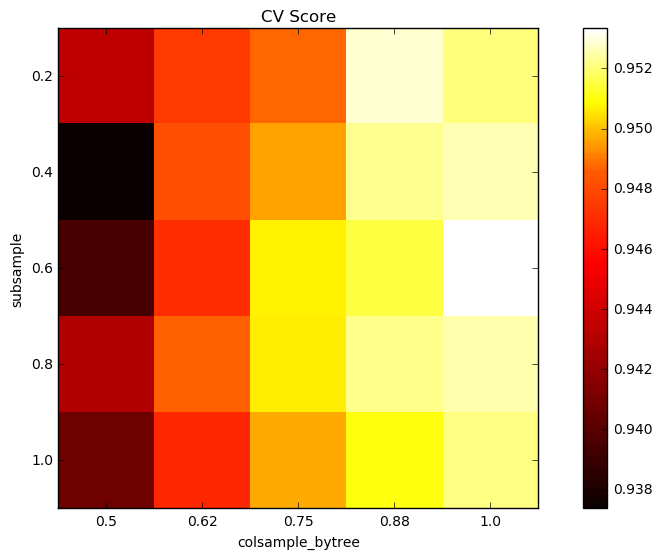

<function __main__.plotgrid>

In [142]:
# get the scores and values for the sliders
scores = np.fabs([x[1] for x in grid.grid_scores_])
vmin = np.min(scores)
vmax = np.max(scores)
mean = np.mean(scores)
step = (vmax-vmin)/100.

widgets.interact(plotgrid, grid=fixed(grid), vmin=FloatSlider(min=vmin, max=vmax, step=step, value=vmin), 
                 vmax=FloatSlider(min=vmin, max=vmax, step=step, value=vmax), 
                 midpoint=FloatSlider(min=vmin, max=vmax, step=step, value=mean))

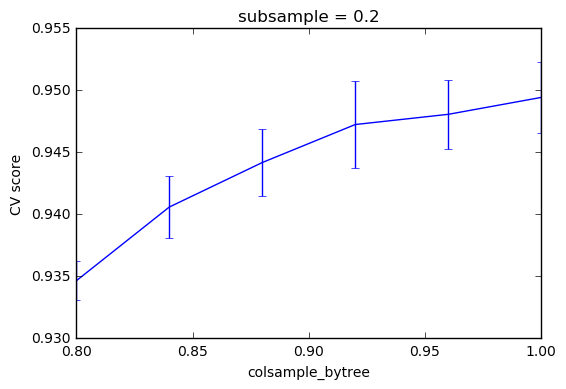

<function __main__.plot1dcut>

In [17]:
fixed_param=param_names[0]
widgets.interact(plot1dcut, grid=fixed(grid), param_names = fixed(param_names), fixed_param_name = fixed(fixed_param), fixed_value_name=SelectionSlider(description=fixed_param, options=param_val_names[fixed_param]))

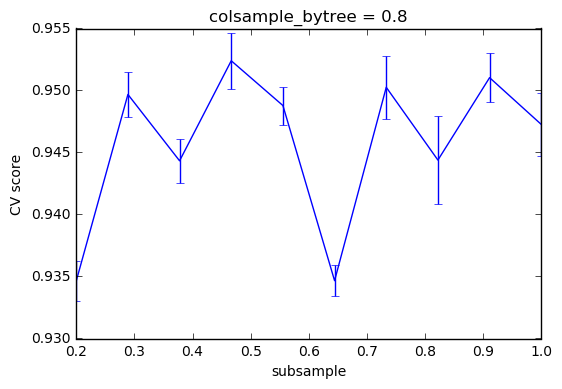

<function __main__.plot1dcut>

In [18]:
fixed_param=param_names[1]
widgets.interact(plot1dcut, grid=fixed(grid), param_names = fixed(param_names), fixed_param_name = fixed(fixed_param), fixed_value_name=SelectionSlider(description=fixed_param, options=param_val_names[fixed_param]))

We choose the approximate maximum:

In [143]:
model.set_params(subsample=0.6, colsample_bytree=0.9)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.9,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=8,
       min_child_weight=1.5, missing=None, n_estimators=400, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.6)

Now we lower the `learning_rate` (so we have to raise `n_estimators`) to get a slightly better model:

In [144]:
model.set_params(n_estimators=10000)
learning_rates = np.logspace(-3, -0.5, 10)
for learning_rate in learning_rates:
    model.set_params(learning_rate=learning_rate)
    optimize_n_estimators(model, df, features)

Learning Rate: 0.001
CV score: 0.9432236 +/ 0.00182083112012
Optimal number of iterations (n_estimators) = 78.
Learning Rate: 0.00189573565241
CV score: 0.9438106 +/ 0.00186921595542
Optimal number of iterations (n_estimators) = 127.
Learning Rate: 0.0035938136638
CV score: 0.9523584 +/ 0.0017229224614
Optimal number of iterations (n_estimators) = 1457.
Learning Rate: 0.00681292069058
CV score: 0.9524556 +/ 0.00172663797248
Optimal number of iterations (n_estimators) = 872.
Learning Rate: 0.0129154966501
CV score: 0.952671 +/ 0.00171891633304
Optimal number of iterations (n_estimators) = 667.
Learning Rate: 0.0244843674682
CV score: 0.953243 +/ 0.00155182383021
Optimal number of iterations (n_estimators) = 335.
Learning Rate: 0.0464158883361
CV score: 0.952087 +/ 0.00173806068939
Optimal number of iterations (n_estimators) = 234.
Learning Rate: 0.0879922543569
CV score: 0.9522502 +/ 0.00226793420363
Optimal number of iterations (n_estimators) = 166.
Learning Rate: 0.16681005372
CV scor

So this is probably close to our best model:

In [145]:
model.set_params(learning_rate=0.02, n_estimators=10000)
optimize_n_estimators(model, df, features)

Learning Rate: 0.02
CV score: 0.9528558 +/ 0.0017768905515
Optimal number of iterations (n_estimators) = 481.



Model Report
Accuracy : 0.88
AUC Score (Test): 0.945338


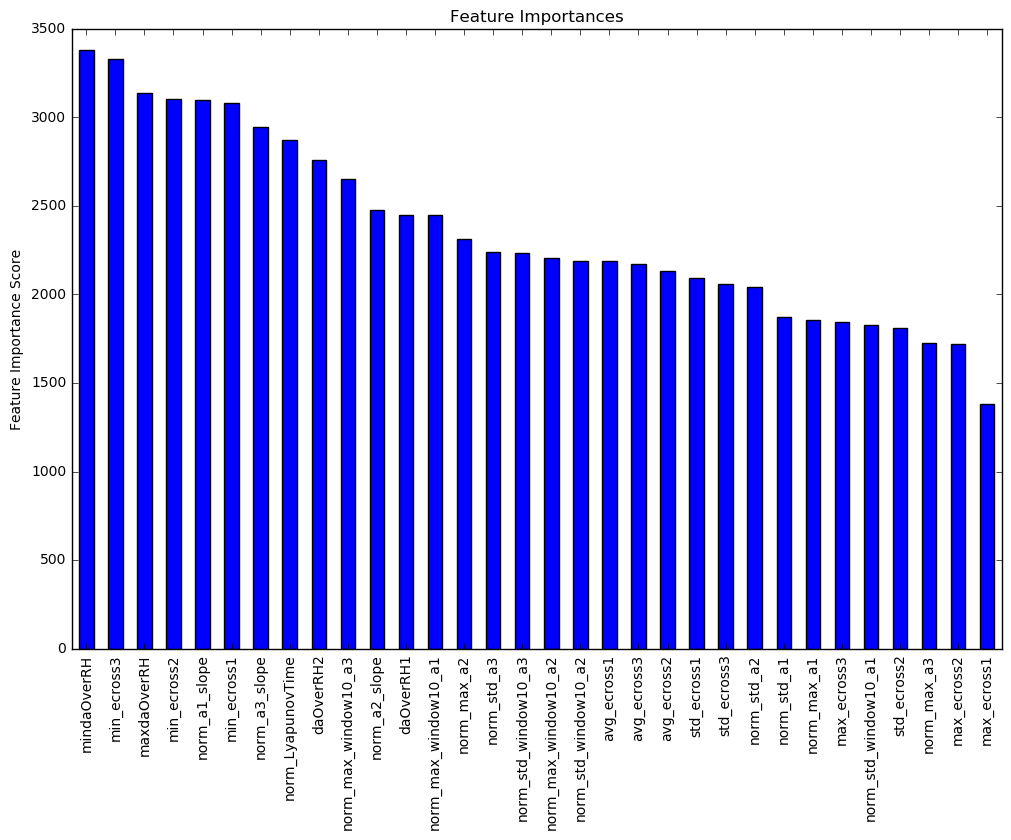

In [146]:
model.fit(df[features], df['Stable'],eval_metric='auc')
        
#Predict training set:
dtrain_predictions = model.predict(df[features])
dtest_predictions = model.predict(dftest[features])
dtrain_predprob = model.predict_proba(df[features])[:,1]
dtest_predprob = model.predict_proba(dftest[features])[:,1]

#Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(dftest['Stable'].values, dtest_predictions)
#print "AUC Score (Train): %f" % metrics.roc_auc_score(df['Stable'], dtrain_predprob)
print "AUC Score (Test): %f" % metrics.roc_auc_score(dftest['Stable'], dtest_predprob)


feat_imp = pd.Series(model.booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances', figsize=(12,8))
plt.ylabel('Feature Importance Score')

In [148]:
dftest["y_pred"] = y_pred[:,1]
dftest.head()

,Stable,Norbits_instability,Norbits,Mplanet,RH/a,a1,P1,e1,pomega1,inc1,...,norm_min_window10_e2,norm_min_e3,norm_min_window10_e3,norm_min_inc1,norm_min_window10_inc1,norm_min_inc2,norm_min_window10_inc2,norm_min_inc3,norm_min_window10_inc3,y_pred
Sim_ID,,,,,,,,,,,,,,,,,,,,,
1648,True,1.000000e+07,10000000.0,0.000015,0.021544,0.040300,0.008090,0.012516,0.738353,0.010083,...,0.007353,0.000124,0.016611,0.002061,0.000299,0.000081,0.000301,0.001068,0.001251,0.761580
3471,False,8.233677e+05,10000000.0,0.000015,0.021544,0.046764,0.010113,0.015860,1.880579,0.012391,...,0.004332,0.000179,0.015675,0.000293,0.000242,0.000046,0.000635,0.000009,0.000270,0.000572
3849,False,7.204145e+03,10000000.0,0.000015,0.021544,0.042360,0.008718,0.014634,-0.601227,0.009680,...,0.041751,0.000054,0.036828,0.000012,0.006989,0.000762,0.002772,0.000394,0.001563,0.000017
3537,False,5.851915e+03,10000000.0,0.000015,0.021544,0.053215,0.012276,0.016287,-3.618376,0.012772,...,0.091574,0.000048,0.015606,0.000246,0.004709,0.000930,0.008343,0.000694,0.000366,0.000028
4214,False,6.435885e+06,10000000.0,0.000015,0.021544,0.054681,0.012787,0.012152,2.292604,0.009484,...,0.065076,0.000003,0.018345,0.000280,0.000247,0.000108,0.009791,0.001519,0.002027,0.001710


In [171]:
unstablewrong = dftest[(dftest['Stable']==True)& (dftest["y_pred"] < 0.02)]
unstablewrong

,Stable,Norbits_instability,Norbits,Mplanet,RH/a,a1,P1,e1,pomega1,inc1,...,norm_min_window10_e2,norm_min_e3,norm_min_window10_e3,norm_min_inc1,norm_min_window10_inc1,norm_min_inc2,norm_min_window10_inc2,norm_min_inc3,norm_min_window10_inc3,y_pred
Sim_ID,,,,,,,,,,,,,,,,,,,,,
2999,True,10000000.0,10000000.0,0.000015,0.021544,0.053516,0.012380,0.001095,1.336931,0.000257,...,0.021468,0.000131,0.018493,0.000018,0.059510,0.000148,0.000603,0.000193,0.000860,0.011465
1622,True,10000000.0,10000000.0,0.000015,0.021544,0.048946,0.010829,0.003269,0.757614,0.002748,...,0.007742,0.000164,0.038065,0.000209,0.003568,0.000044,0.000120,0.000752,0.000852,0.000211
4283,True,10000000.0,10000000.0,0.000015,0.021544,0.045652,0.009754,0.013522,1.325028,0.004092,...,0.007832,0.000080,0.003418,0.000762,0.000169,0.000982,0.003714,0.000665,0.000555,0.003004
941,True,10000000.0,10000000.0,0.000015,0.021544,0.047157,0.010240,0.013640,-1.693541,0.010853,...,0.008277,0.000014,0.004693,0.000089,0.000622,0.000525,0.000130,0.002735,0.005194,0.017785
2882,True,10000000.0,10000000.0,0.000015,0.021544,0.043020,0.008923,0.004473,-1.073893,0.016196,...,0.015235,0.000144,0.125821,0.000056,0.001291,0.000954,0.000449,0.000036,0.000381,0.002597
2756,True,10000000.0,10000000.0,0.000015,0.021544,0.058271,0.014066,0.008923,2.087697,0.004607,...,0.014307,0.000219,0.029906,0.000198,0.019565,0.000525,0.001018,0.000705,0.002469,0.000189
3646,True,10000000.0,10000000.0,0.000015,0.021544,0.054326,0.012662,0.002225,1.041172,0.011112,...,0.022338,0.000064,0.031911,0.000074,0.005062,0.000385,0.004677,0.000297,0.000991,0.004014
2881,True,10000000.0,10000000.0,0.000015,0.021544,0.055634,0.013122,0.005861,-0.915935,0.009005,...,0.001278,0.000052,0.010062,0.000081,0.002077,0.000019,0.006980,0.000256,0.000075,0.008590
2137,True,10000000.0,10000000.0,0.000015,0.021544,0.051436,0.011665,0.018592,-0.304708,0.000166,...,0.002501,0.000726,0.036647,0.000249,0.002657,0.000204,0.000054,0.000024,0.000666,0.001301


In [168]:
unstablecorrect = dftest[(dftest['Stable']==False)& (dftest["y_pred"] < 0.05)]

In [170]:
unstablecorrect.head(20)

,Stable,Norbits_instability,Norbits,Mplanet,RH/a,a1,P1,e1,pomega1,inc1,...,norm_min_window10_e2,norm_min_e3,norm_min_window10_e3,norm_min_inc1,norm_min_window10_inc1,norm_min_inc2,norm_min_window10_inc2,norm_min_inc3,norm_min_window10_inc3,y_pred
Sim_ID,,,,,,,,,,,,,,,,,,,,,
3471,False,8.233677e+05,10000000.0,0.000015,0.021544,0.046764,0.010113,0.015860,1.880579,0.012391,...,0.004332,0.000179,0.015675,0.000293,0.000242,0.000046,0.000635,0.000009,0.000270,0.000572
3849,False,7.204145e+03,10000000.0,0.000015,0.021544,0.042360,0.008718,0.014634,-0.601227,0.009680,...,0.041751,0.000054,0.036828,0.000012,0.006989,0.000762,0.002772,0.000394,0.001563,0.000017
3537,False,5.851915e+03,10000000.0,0.000015,0.021544,0.053215,0.012276,0.016287,-3.618376,0.012772,...,0.091574,0.000048,0.015606,0.000246,0.004709,0.000930,0.008343,0.000694,0.000366,0.000028
4214,False,6.435885e+06,10000000.0,0.000015,0.021544,0.054681,0.012787,0.012152,2.292604,0.009484,...,0.065076,0.000003,0.018345,0.000280,0.000247,0.000108,0.009791,0.001519,0.002027,0.001710
4766,False,2.506675e+06,10000000.0,0.000015,0.021544,0.055361,0.013026,0.018525,0.444566,0.016894,...,0.010005,0.000157,0.025186,0.000936,0.000200,0.000281,0.000001,0.000048,0.002151,0.032859
1344,False,2.732746e+04,10000000.0,0.000015,0.021544,0.048337,0.010627,0.011736,1.276011,0.004119,...,0.038986,0.000166,0.001923,0.000163,0.000592,0.001083,0.001327,0.000009,0.005670,0.000021
2766,False,6.384037e+04,10000000.0,0.000015,0.021544,0.049733,0.011091,0.014592,1.356425,0.015504,...,0.004186,0.001054,0.011873,0.000268,0.001595,0.000466,0.000615,0.000022,0.000118,0.000002
2747,False,4.395730e+05,10000000.0,0.000015,0.021544,0.044777,0.009475,0.018424,-4.642484,0.005021,...,0.045979,0.000129,0.034424,0.000502,0.000703,0.000068,0.000520,0.000001,0.002148,0.000374
1502,False,1.909149e+06,10000000.0,0.000015,0.021544,0.043385,0.009037,0.008600,-0.879903,0.009561,...,0.005856,0.000620,0.115301,0.000046,0.001035,0.000053,0.000517,0.000297,0.003519,0.008834


In [149]:
correct = dftest[(dftest['Stable'] == True) & (dftest["y_pred"] > 0.98)]

In [151]:
correct.head(20)

,Stable,Norbits_instability,Norbits,Mplanet,RH/a,a1,P1,e1,pomega1,inc1,...,norm_min_window10_e2,norm_min_e3,norm_min_window10_e3,norm_min_inc1,norm_min_window10_inc1,norm_min_inc2,norm_min_window10_inc2,norm_min_inc3,norm_min_window10_inc3,y_pred
Sim_ID,,,,,,,,,,,,,,,,,,,,,
1229,True,10000000.0,10000000.0,0.000015,0.021544,0.042544,0.008775,0.002086,2.089051,0.003208,...,0.019854,0.000201,0.010559,0.000196,0.006560,3.612890e-04,0.000780,0.000124,0.001532,0.999860
2439,True,10000000.0,10000000.0,0.000015,0.021544,0.040515,0.008155,0.017691,-0.496025,0.012316,...,0.022794,0.000050,0.048939,0.000046,0.001098,5.569454e-05,0.000706,0.000012,0.000432,0.986753
3090,True,10000000.0,10000000.0,0.000015,0.021544,0.048224,0.010590,0.010694,0.868639,0.012827,...,0.163541,0.000002,0.011410,0.000226,0.000115,1.231107e-04,0.000252,0.000521,0.000535,0.988397
1644,True,10000000.0,10000000.0,0.000015,0.021544,0.049041,0.010860,0.000342,0.154817,0.011433,...,0.001285,0.000209,0.013816,0.000257,0.000247,1.890727e-04,0.002536,0.000305,0.000074,0.999957
759,True,10000000.0,10000000.0,0.000015,0.021544,0.041181,0.008357,0.006286,-1.417579,0.007818,...,0.007970,0.000094,0.006187,0.000052,0.000115,7.661163e-04,0.027224,0.000446,0.000051,0.999760
1515,True,10000000.0,10000000.0,0.000015,0.021544,0.056134,0.013299,0.010586,-0.401963,0.010905,...,0.180104,0.000535,0.056114,0.000178,0.000428,3.012371e-04,0.002223,0.000252,0.000403,0.997218
4470,True,10000000.0,10000000.0,0.000015,0.021544,0.045170,0.009600,0.017861,0.765424,0.017440,...,0.042128,0.000174,0.008893,0.000182,0.000263,4.184453e-04,0.000858,0.000006,0.000287,0.999880
516,True,10000000.0,10000000.0,0.000015,0.021544,0.056298,0.013358,0.015377,-0.521962,0.011079,...,0.010447,0.000218,0.062592,0.000166,0.000107,1.337843e-04,0.000306,0.000232,0.000210,0.998073
427,True,10000000.0,10000000.0,0.000015,0.021544,0.043273,0.009002,0.000912,1.842289,0.011762,...,0.003072,0.000158,0.010561,0.000169,0.000025,6.722698e-07,0.001320,0.000173,0.001122,0.985763


In [17]:
misclass = dftest[(dftest['Stable'] == False) & (dftest["y_pred"] > 0.98)]
misclass

KeyError: 'y_pred'

In [153]:
misclass["P3/P2"] = misclass["P3"]/misclass["P2"]
misclass["P3/P1"] = misclass["P3"]/misclass["P1"]
misclass["P2/P1"] = misclass["P2"]/misclass["P1"]
misclass.head()

/mnt/raid-cita/dtamayo/p2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/mnt/raid-cita/dtamayo/p2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/mnt/raid-cita/dtamayo/p2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

,Stable,Norbits_instability,Norbits,Mplanet,RH/a,a1,P1,e1,pomega1,inc1,...,norm_min_inc1,norm_min_window10_inc1,norm_min_inc2,norm_min_window10_inc2,norm_min_inc3,norm_min_window10_inc3,y_pred,P3/P2,P3/P1,P2/P1
Sim_ID,,,,,,,,,,,,,,,,,,,,,
4002,False,1.285084e+06,10000000.0,0.000015,0.021544,0.058205,0.014042,0.016157,0.160546,0.013167,...,0.000452,0.000333,0.000254,0.016016,0.000265,0.000351,0.993154,1.287751,1.624417,1.261437
4404,False,2.993244e+06,10000000.0,0.000015,0.021544,0.049501,0.011013,0.001038,-4.364727,0.013987,...,0.000138,0.000278,0.000494,0.001388,0.000353,0.001134,0.991182,1.296650,1.589283,1.225683
2487,False,3.973838e+06,10000000.0,0.000015,0.021544,0.059417,0.014483,0.003450,2.960035,0.011546,...,0.000085,0.000321,0.000906,0.000920,0.000410,0.000010,0.997303,1.234291,1.569802,1.271825
1042,False,4.722415e+06,10000000.0,0.000015,0.021544,0.044990,0.009543,0.017693,-3.208836,0.017402,...,0.000216,0.001197,0.000066,0.000996,0.000029,0.000012,0.983174,1.295359,1.573216,1.214502
313,False,8.667267e+06,10000000.0,0.000015,0.021544,0.051292,0.011616,0.017445,1.211552,0.002447,...,0.000754,0.003719,0.000506,0.000215,0.000714,0.001024,0.985943,1.224388,1.591928,1.300183


In [186]:
sim_id = 4283
dfdist = pd.read_csv('/mnt/raid-cita/dtamayo/Stability/data/distribution/outputs'+str(sim_id)+'/distributionallfeatures'+str(sim_id)+'.csv', encoding='ascii')

In [187]:
dfdist.tail()

,Sim_ID,Stable,Norbits_instability,Norbits,Mplanet,RH/a,a1,P1,e1,pomega1,...,max_iH1,max_iH2,max_iH3,min_iH1,min_iH2,min_iH3,mean_std_iH,norm_a1_slope,norm_a2_slope,norm_a3_slope
995,995,False,4.220480e+06,10000000.0,0.000015,0.021544,0.045652,0.009754,0.013522,1.325028,...,0.504773,0.476772,0.476258,0.153493,0.142702,0.114034,0.138363,-5.063991e-10,2.003642e-09,-1.534471e-09
996,996,False,2.797826e+06,10000000.0,0.000015,0.021544,0.045652,0.009754,0.013522,1.325028,...,0.504773,0.476944,0.476258,0.153493,0.142702,0.114034,0.138374,-5.306702e-10,2.054205e-09,-1.556078e-09
997,997,False,2.938650e+06,10000000.0,0.000015,0.021544,0.045652,0.009754,0.013522,1.325028,...,0.504773,0.476783,0.476258,0.153493,0.142702,0.114034,0.138360,-5.011742e-10,1.993703e-09,-1.530899e-09
998,998,False,1.744611e+07,10000000.0,0.000015,0.021544,0.045652,0.009754,0.013522,1.325028,...,0.504773,0.476790,0.476258,0.153493,0.142702,0.114034,0.138359,-4.991493e-10,1.989510e-09,-1.529245e-09
999,999,False,2.035919e+06,10000000.0,0.000015,0.021544,0.045652,0.009754,0.013522,1.325028,...,0.504773,0.476781,0.476258,0.153493,0.142702,0.114034,0.138361,-5.020798e-10,1.995487e-09,-1.531564e-09


In [188]:
dfdist["y_pred"] = model.predict_proba(dfdist[features])[:,1]
dfdist.tail()

,Sim_ID,Stable,Norbits_instability,Norbits,Mplanet,RH/a,a1,P1,e1,pomega1,...,max_iH2,max_iH3,min_iH1,min_iH2,min_iH3,mean_std_iH,norm_a1_slope,norm_a2_slope,norm_a3_slope,y_pred
995,995,False,4.220480e+06,10000000.0,0.000015,0.021544,0.045652,0.009754,0.013522,1.325028,...,0.476772,0.476258,0.153493,0.142702,0.114034,0.138363,-5.063991e-10,2.003642e-09,-1.534471e-09,0.020058
996,996,False,2.797826e+06,10000000.0,0.000015,0.021544,0.045652,0.009754,0.013522,1.325028,...,0.476944,0.476258,0.153493,0.142702,0.114034,0.138374,-5.306702e-10,2.054205e-09,-1.556078e-09,0.033983
997,997,False,2.938650e+06,10000000.0,0.000015,0.021544,0.045652,0.009754,0.013522,1.325028,...,0.476783,0.476258,0.153493,0.142702,0.114034,0.138360,-5.011742e-10,1.993703e-09,-1.530899e-09,0.015805
998,998,False,1.744611e+07,10000000.0,0.000015,0.021544,0.045652,0.009754,0.013522,1.325028,...,0.476790,0.476258,0.153493,0.142702,0.114034,0.138359,-4.991493e-10,1.989510e-09,-1.529245e-09,0.016898
999,999,False,2.035919e+06,10000000.0,0.000015,0.021544,0.045652,0.009754,0.013522,1.325028,...,0.476781,0.476258,0.153493,0.142702,0.114034,0.138361,-5.020798e-10,1.995487e-09,-1.531564e-09,0.020058


In [189]:
dfdist.to_csv('/mnt/raid-cita/dtamayo/Stability/data/distribution/outputs'+str(sim_id)+'/distributionallfeatures'+str(sim_id)+'.csv', encoding='ascii')

In [163]:
# Histogram:

bins = 50
y_pred=model.predict_proba(dftest[features])
Stable=y_pred[dftest['Stable'].values][:,1]
Unstable=y_pred[~dftest['Stable'].values][:,1]


#df['Predict'].loc[df['Truth']==1]

fig, ax1 = plt.subplots()
ax1.hist(Unstable, bins, alpha=0.5, label='No', color='blue')
ax1.set_xlabel('Predicted Probability', fontsize=14)
ax1.set_ylabel('Unstable',  fontsize=14, color='blue')
for tl in ax1.get_yticklabels():
    tl.set_color('blue')
    


ax2 = ax1.twinx()
ax2.hist(Stable, bins, alpha=0.5, label='Yes',color='green')
ax2.set_ylabel('Stable', fontsize=14, color='green')
for tl in ax2.get_yticklabels():
    tl.set_color('green')
 
ax1.set_ylim([0,250])
ax2.set_ylim([0,250])


XGBoostError: need to call fit beforehand

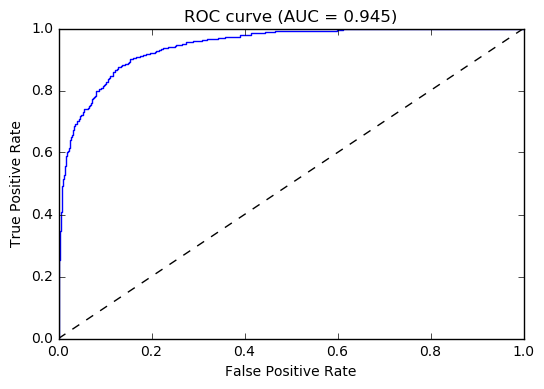

In [154]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(dftest['Stable'], y_pred[:,1])
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve (AUC = {0:.3f})'.format(metrics.roc_auc_score(dftest['Stable'], dtest_predprob)))

In [155]:
for i in range(0,len(fpr), 10):
    print("Threshold {0}, FPR = {1}, TPR = {2}".format(thresholds[i], fpr[i], tpr[i]))

Threshold 0.999996900558, FPR = 0.0, TPR = 0.00225225225225
Threshold 0.999304294586, FPR = 0.00378787878788, TPR = 0.283783783784
Threshold 0.992595851421, FPR = 0.00852272727273, TPR = 0.484234234234
Threshold 0.985874176025, FPR = 0.0142045454545, TPR = 0.527027027027
Threshold 0.967158734798, FPR = 0.0198863636364, TPR = 0.601351351351
Threshold 0.942045092583, FPR = 0.0265151515152, TPR = 0.641891891892
Threshold 0.90106856823, FPR = 0.0331439393939, TPR = 0.671171171171
Threshold 0.858253657818, FPR = 0.0407196969697, TPR = 0.695945945946
Threshold 0.767970860004, FPR = 0.0530303030303, TPR = 0.720720720721
Threshold 0.544956445694, FPR = 0.0691287878788, TPR = 0.752252252252
Threshold 0.461590826511, FPR = 0.0767045454545, TPR = 0.777027027027
Threshold 0.369676470757, FPR = 0.0880681818182, TPR = 0.801801801802
Threshold 0.282284229994, FPR = 0.0975378787879, TPR = 0.815315315315
Threshold 0.207061991096, FPR = 0.108901515152, TPR = 0.837837837838
Threshold 0.147689551115, FPR 

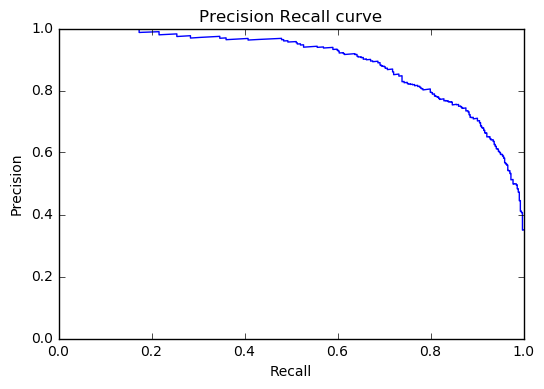

In [156]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(dftest['Stable'], y_pred[:,1])
fig, ax = plt.subplots()
ax.plot(recall, precision)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision Recall curve')

In [157]:
for i in range(0,len(recall), 40):
    print("Threshold {0}, Precision = {1}, Recall = {2}".format(thresholds[i], precision[i], recall[i]))

Threshold 4.56061497971e-05, Precision = 0.350157728707, Recall = 1.0
Threshold 5.7720910263e-05, Precision = 0.360749185668, Recall = 0.997747747748
Threshold 8.15887760837e-05, Precision = 0.372895622896, Recall = 0.997747747748
Threshold 0.000120490178233, Precision = 0.385888501742, Recall = 0.997747747748
Threshold 0.000164527096786, Precision = 0.399819494585, Recall = 0.997747747748
Threshold 0.000222387519898, Precision = 0.412921348315, Recall = 0.993243243243
Threshold 0.000313080498017, Precision = 0.428988326848, Recall = 0.993243243243
Threshold 0.000433447596151, Precision = 0.445344129555, Recall = 0.990990990991
Threshold 0.000606531102676, Precision = 0.464135021097, Recall = 0.990990990991
Threshold 0.000932417926379, Precision = 0.483480176211, Recall = 0.988738738739
Threshold 0.00152954016812, Precision = 0.5, Recall = 0.977477477477
Threshold 0.00210319692269, Precision = 0.521739130435, Recall = 0.972972972973
Threshold 0.00320304674096, Precision = 0.54441624365

In [158]:
quant = np.arange(0.01, 1.0, 0.01)*100
prob_Stable = np.percentile(Stable,quant)

quant_f = interp1d(prob_Stable, quant)
prob_f=interp1d(quant, prob_Stable)

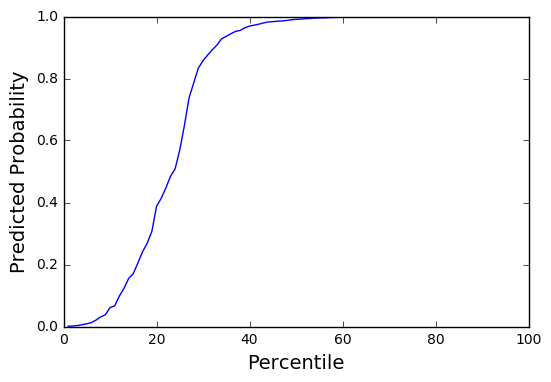

In [159]:
fig, ax = plt.subplots()
plt.plot(quant, prob_Stable)
ax.set_xlabel('Percentile', fontsize=14)
ax.set_ylabel('Predicted Probability', fontsize=14)
plt.show()

In [160]:
_tv = []
_accv = []
_accnormv = []
for i, thresh in enumerate(prob_Stable):
    _loc_yes = Stable >= thresh
    _loc_no = Unstable >= thresh
    _yes = Stable[_loc_yes].shape[0]
    _no = Unstable[_loc_no].shape[0]
    _total = _yes + _no
    if i % 5 == 0:
        print(thresh, _yes*100 / _total)
    _tv.append(thresh)
    _accv.append(_yes*100/_total)
#    _accnormv.append(_yes / Stable.shape[0] / (_yes / Stable.shape[0] + _no / Unstable.shape[0]))
_tv = np.asarray(_tv)
_accv = np.asarray(_accv)
#_accnormv = np.asarray(_accnormv)

(0.00081794015248306097, 47)
(0.012467288766056309, 62)
(0.066552091166377073, 71)
(0.20511073291301724, 76)
(0.41319544553756715, 80)
(0.64817973494529757, 83)
(0.87566278874874115, 88)
(0.94451756715774526, 91)
(0.97203314960002896, 93)
(0.98490604639053347, 94)
(0.9915162450075149, 96)
(0.99555012702941892, 96)
(0.99774528920650474, 96)
(0.99877018332481382, 97)
(0.9992425602674484, 96)
(0.99956818342208864, 98)
(0.99978247046470647, 98)
(0.99988732814788828, 100)
(0.99994443178176873, 100)
(0.99998286724090579, 100)


Pred prob for 90 percent accuracy: 0.936105
Pred prob for 80 percent accuracy: 0.446470


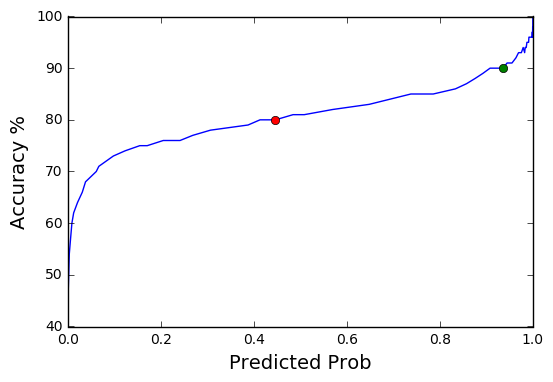

To obtain 90 percent accuracy need to go to 35 quantile
To obtain 80 percent accuracy need to go to 22 quantile


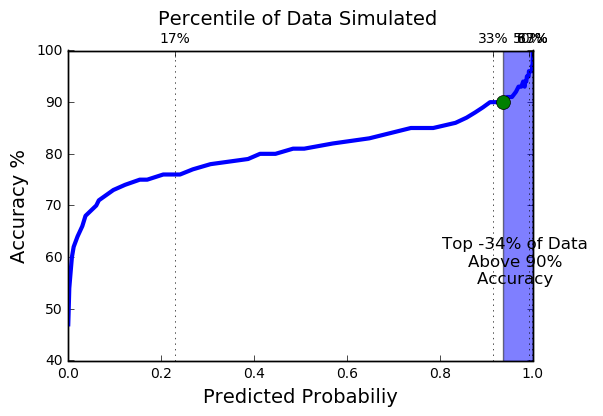

In [161]:
# Find 90% accuracy:
# calculate fit
thr_f = interp1d(_accv, _tv)

# calculate new x's and y's
thresh_fit = thr_f(_accv)
thresh_90=thr_f(90)
thresh_80=thr_f(80)

print('Pred prob for 90 percent accuracy: %f' % thresh_90)
print('Pred prob for 80 percent accuracy: %f' % thresh_80)

fig, ax1 = plt.subplots()
plt.plot(_tv, _accv , thresh_90, 90, 'o', thresh_80, 80, 'o')

ax1.set_xlabel('Predicted Prob', fontsize=14)
ax1.set_ylabel('Accuracy %', fontsize=14)
plt.show()

# calculate new x's and y's
quant_fit = quant_f(prob_Stable)
quant_acc90=quant_f(thresh_90)
quant_acc80=quant_f(thresh_80)
print('To obtain 90 percent accuracy need to go to %1.f quantile' % quant_acc90)
print('To obtain 80 percent accuracy need to go to %1.f quantile' % quant_acc80)


fig, ax1 = plt.subplots()
#plt.plot(f(_tv),_accv *100., f(thresh_90),0.9*100., 'o', markersize=10, color=orangeWCN, LineWidth=3)
ax1.plot(_tv,_accv, thresh_90, 90, 'o', markersize=10,  lw=3, zorder=60)
ax1.set_xlabel('Predicted Probabiliy', fontsize=14)

ax1.set_ylabel('Accuracy %', fontsize=14)
ay2 = ax1.twiny()

# setting grid:
#plt.grid()
xticks=prob_f(np.array([0.167, 0.333, 0.5, 0.667, 0.833])*100)
xlabels=['17%', '33%', '50%', '67%','83%']


ay2.xaxis.grid(True, which='major', zorder=50)

ay2.set_xlabel('Percentile of Data Simulated ' , fontsize=14)
ay2.set_xlim(ax1.get_xlim())
ay2.set_xticks(xticks, minor=False)
ay2.set_xticklabels(xlabels)



ax1.axvspan(thresh_90, 1, alpha=0.5, zorder=20)
legend = ax1.text((1-thresh_90)/2+thresh_90, 55, 'Top %.0f%% of Data \nAbove 90%% \nAccuracy ' %((1-quant_f(thresh_90))),
                  fontsize=12, ha='center', zorder=40)

